# Plotting 

In [ ]:
!pip install bettermdptools

In [1]:
import gymnasium as gym
from bettermdptools.utils.test_env import TestEnv
from bettermdptools.algorithms.rl import RL
from bettermdptools.algorithms.planner import Planner
from bettermdptools.utils.plots import Plots
from bettermdptools.envs.blackjack_wrapper import BlackjackWrapper
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## State values heat map

runtime = 0.57 seconds


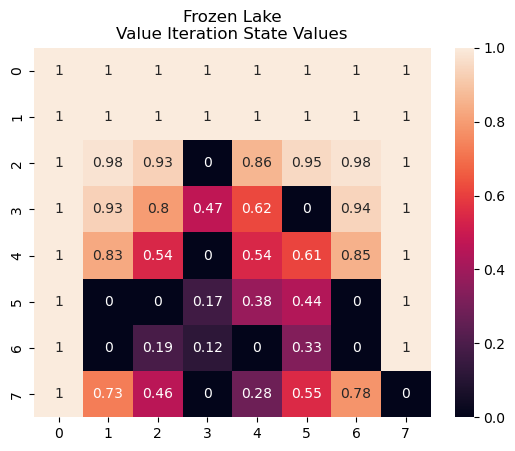

In [2]:
frozen_lake = gym.make('FrozenLake8x8-v1', render_mode=None)
V, V_track, pi = Planner(frozen_lake.unwrapped.P).value_iteration(n_iters=5000)
size=(8,8)
Plots.values_heat_map(V, "Frozen Lake\nValue Iteration State Values", size)

## State values v. iterations

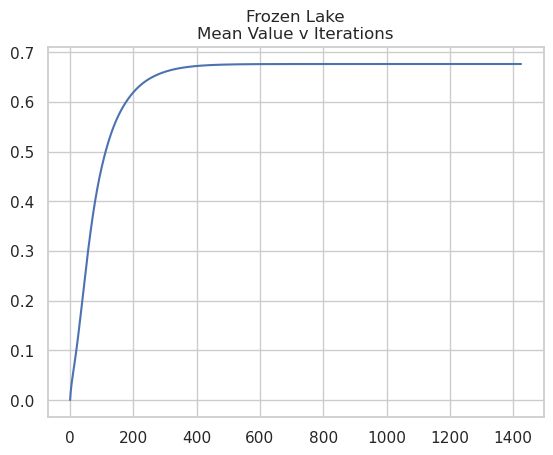

In [3]:
# Clip trailing zeros in case convergence is reached before max iterations
# This is likely when setting the n_iters parameter
max_value_per_iter = np.trim_zeros(np.mean(V_track, axis=1), 'b')
Plots.v_iters_plot(max_value_per_iter, "Frozen Lake\nMean Value v Iterations")

## Policy maps

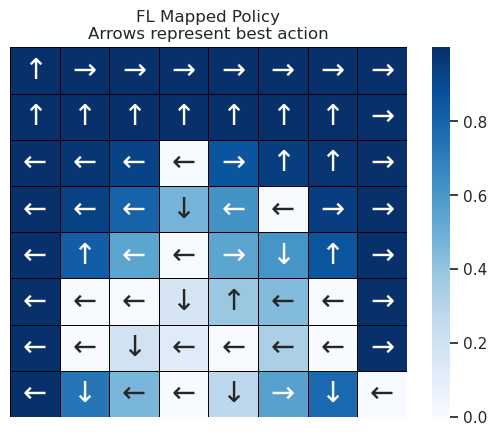

In [4]:
fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
fl_map_size=(8,8)
title="FL Mapped Policy\nArrows represent best action"
val_max, policy_map = Plots.get_policy_map(pi, V, fl_actions, fl_map_size)
Plots.plot_policy(val_max, policy_map, fl_map_size, title)

### The policy plot works with other environments, but we'll make some custom edits to improve the visuals. 

runtime = 0.03 seconds


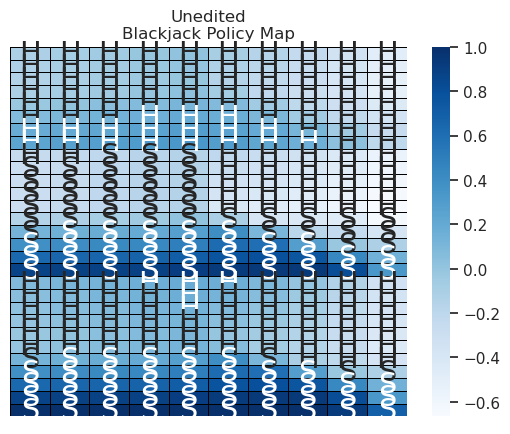

In [5]:
#create env. 
base_env = gym.make('Blackjack-v1', render_mode=None)
blackjack = BlackjackWrapper(base_env)

#run VI
V, V_track, pi = Planner(blackjack.unwrapped.P).value_iteration()

#create actions dictionary and set map size
blackjack_actions = {0: "S", 1: "H"}
blackjack_map_size=(29, 10)

#get formatted state values and policy map
val_max, policy_map = Plots.get_policy_map(pi, V, blackjack_actions, blackjack_map_size)

#plot policy map
title="Unedited\nBlackjack Policy Map"
Plots.plot_policy(val_max, policy_map, blackjack_map_size, title)

### Customized policy map using the add_to decorator. 

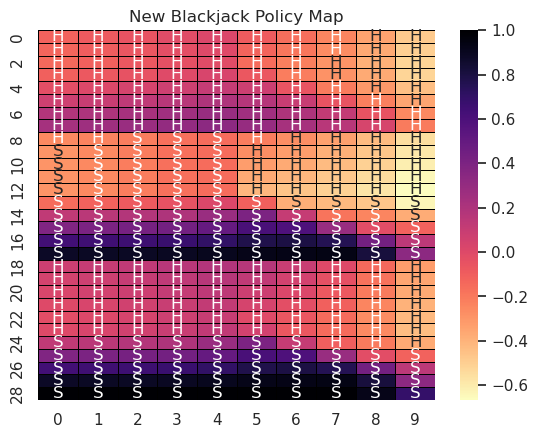

In [7]:
from bettermdptools.utils.decorators import add_to

@add_to(Plots)
@staticmethod
def modified_plot_policy(val_max, directions, map_size, title):
    """Plot the policy learned."""
    sns.heatmap(
        val_max,
        annot=directions,
        fmt="",
        cmap=sns.color_palette("magma_r", as_cmap=True),
        linewidths=0.7,
        linecolor="black",
    ).set(title=title)
    img_title = f"Policy_{map_size[0]}x{map_size[1]}.png"
    plt.show()

title = "New Blackjack Policy Map"
Plots.modified_plot_policy(val_max, policy_map, blackjack_map_size, title)